# Metropolis-Hastings Algorithm

In [4]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [5]:
def ring(x, c, r, w):
    return stats.norm.pdf(((x[0] - c[0])**2 + (x[1] - c[1])**2)**0.5, r, w)

def target_density(x):
    r = 1.05
    w = 0.1
    result = 0
    for c in [[0, 0], [2.5, 0], [-2.5, 0], [1.25, -1.25], [-1.25, -1.25]]:
        result += ring(x, c, r, w)
    return result

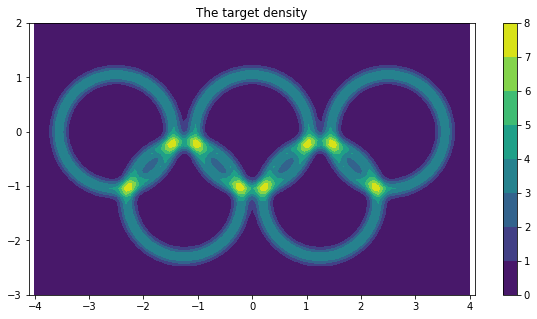

In [6]:
# Plot the target density
x = np.linspace(-4, 4, 101)
X, Y = np.meshgrid(x, x)
Z = np.zeros(X.shape)
for i in range(len(x)):
    for j in range(len(x)):
        Z[i,j] = target_density([X[i,j], Y[i,j]])

plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z)
plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 2)
plt.colorbar()
plt.title('The target density')
plt.show()

In [7]:
def proposal_function(x, scale):
    '''
    A symmetric normal distribution around x.
    The scale parameter sets the standard deviation of the distribution.
    '''
    return [
        np.random.normal(x[0], scale),
        np.random.normal(x[1], scale)]

In [8]:
def simulation(total_samples, steps_between_samples, proposal_scale):
    
    total_steps = total_samples * steps_between_samples
    state = np.empty((total_steps + 1, 2))
    state[0,:] = [0,0]
    accepted = 0
    for step in range(total_steps):
        proposal = proposal_function(state[step], scale=proposal_scale)
        p = min(1, target_density(proposal) / target_density(state[step]))
        if np.random.uniform(0, 1) < p:
            state[step+1] = proposal
            accepted += 1
        else:
            state[step+1] = state[step]
    
    acceptance_rate = accepted / total_steps
    state = state[1::steps_between_samples]
    return acceptance_rate, state

In [10]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    '''
    from scipy import signal
    plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

Processing scale =  0.1
Acceptance rate =  0.7367


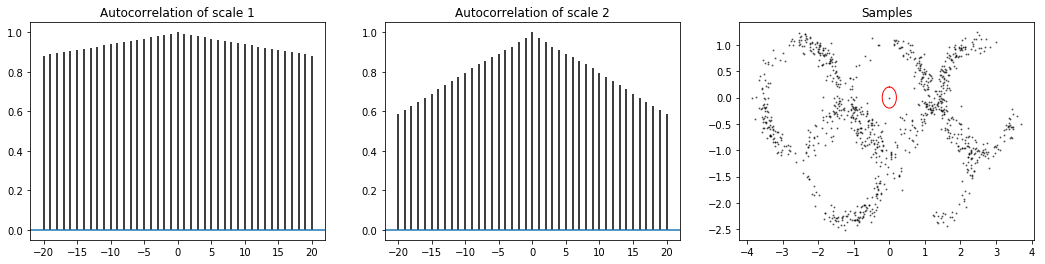

Processing scale =  0.15
Acceptance rate =  0.6477


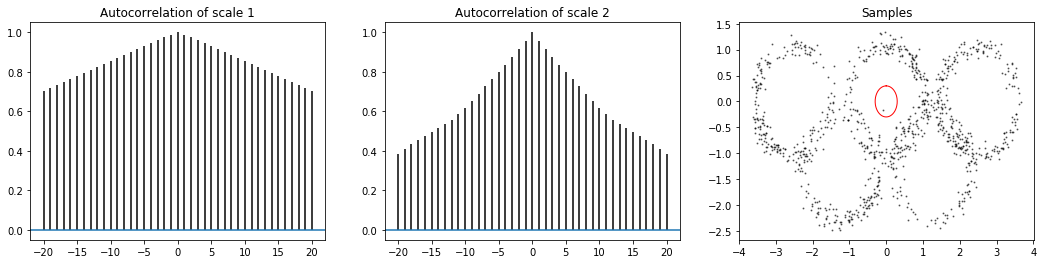

Processing scale =  0.2
Acceptance rate =  0.5878


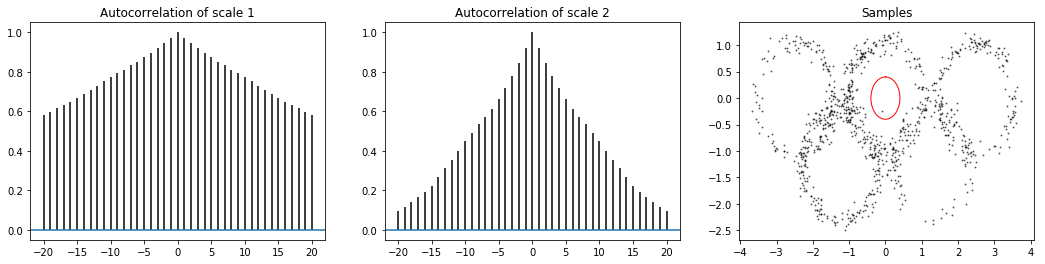

Processing scale =  0.25
Acceptance rate =  0.4963


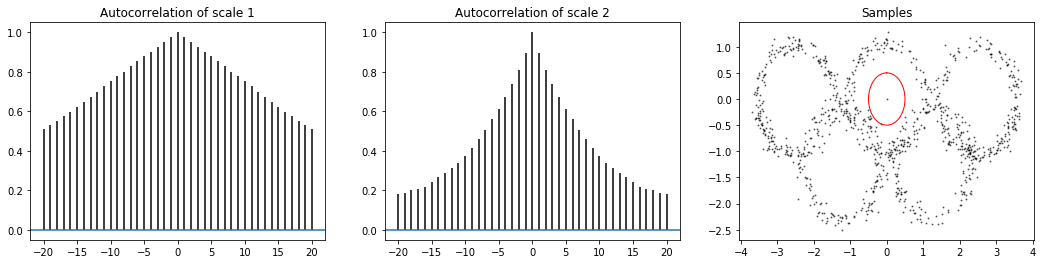

Processing scale =  0.3
Acceptance rate =  0.4514


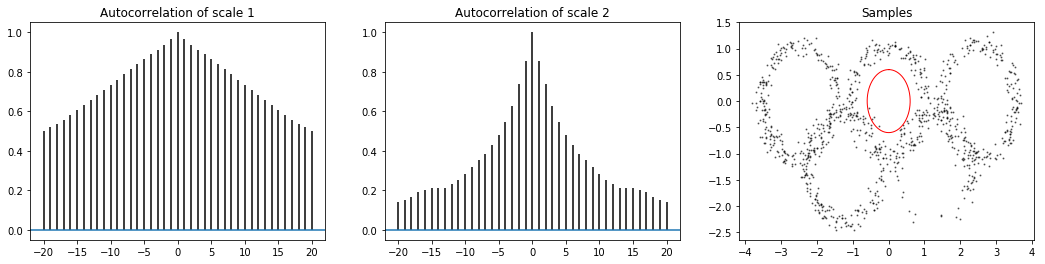

Processing scale =  0.35
Acceptance rate =  0.4108


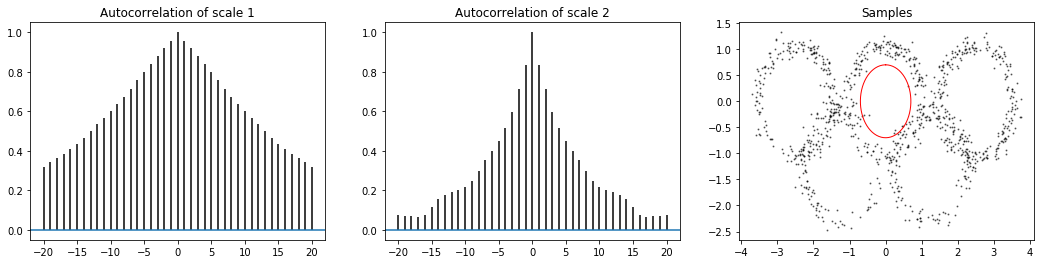

Processing scale =  0.4
Acceptance rate =  0.392


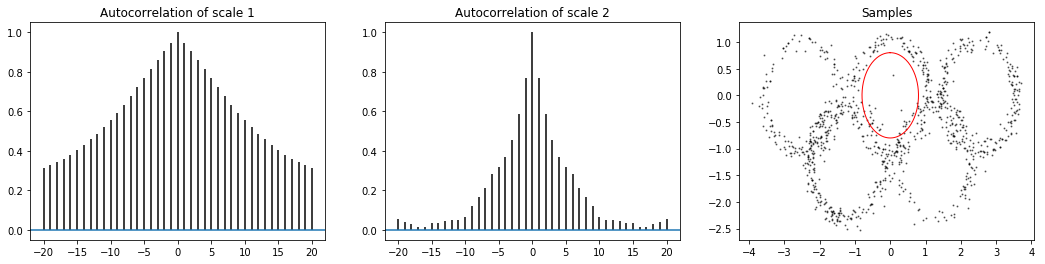

Processing scale =  0.45
Acceptance rate =  0.377


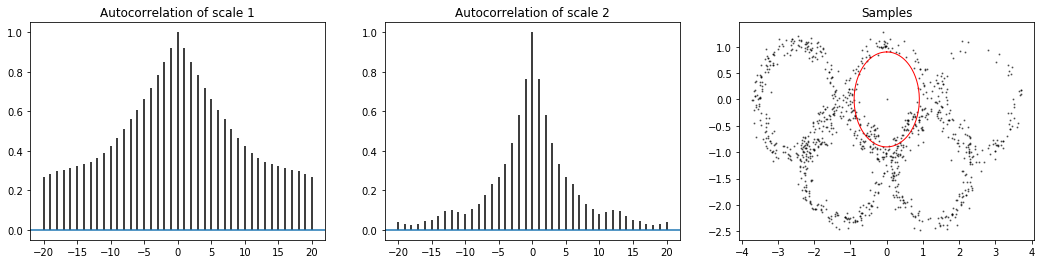

Processing scale =  0.5
Acceptance rate =  0.3393


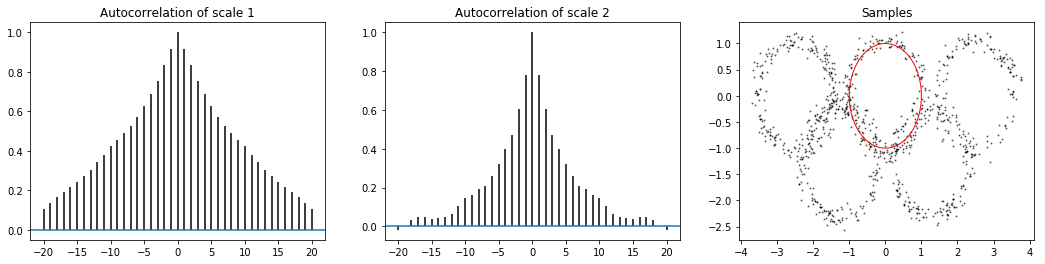

Processing scale =  0.55
Acceptance rate =  0.3392


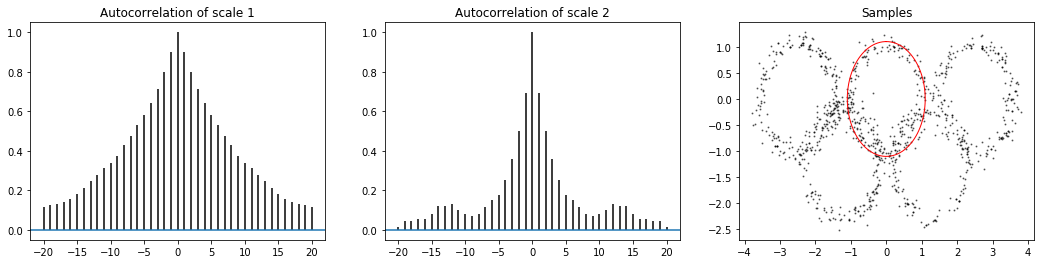

Processing scale =  0.6
Acceptance rate =  0.3285


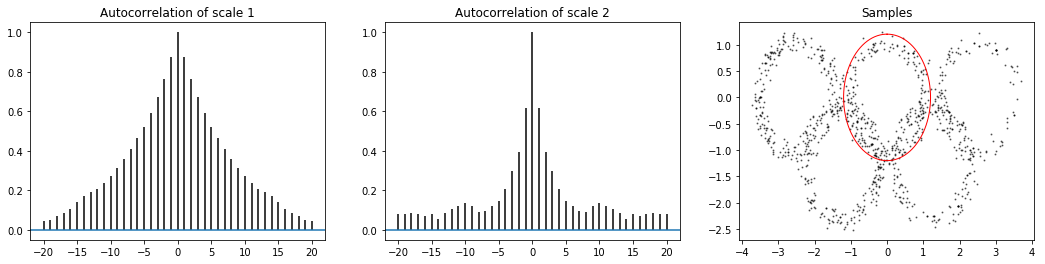

Processing scale =  0.65
Acceptance rate =  0.2912


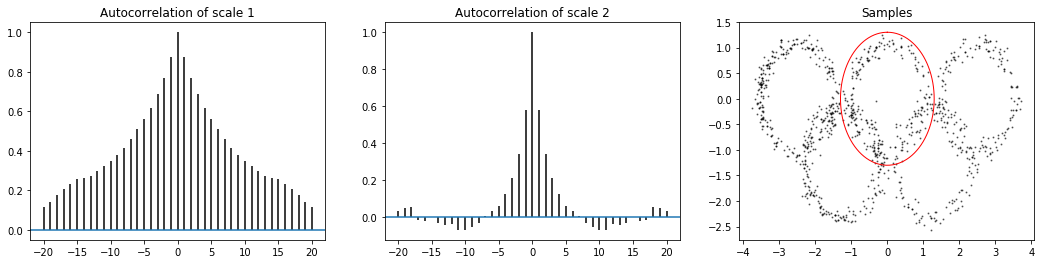

Processing scale =  0.7
Acceptance rate =  0.2932


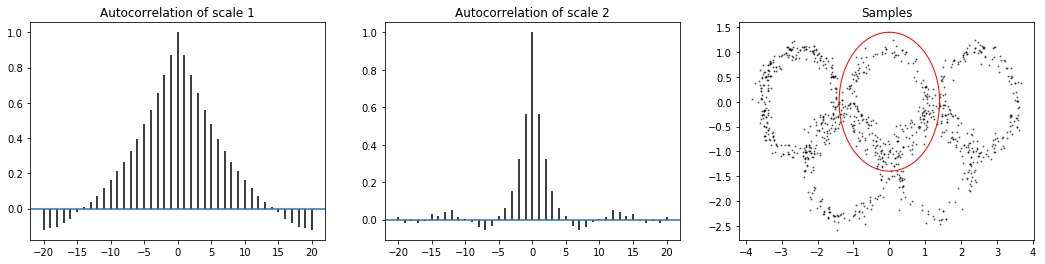

Processing scale =  0.75
Acceptance rate =  0.2777


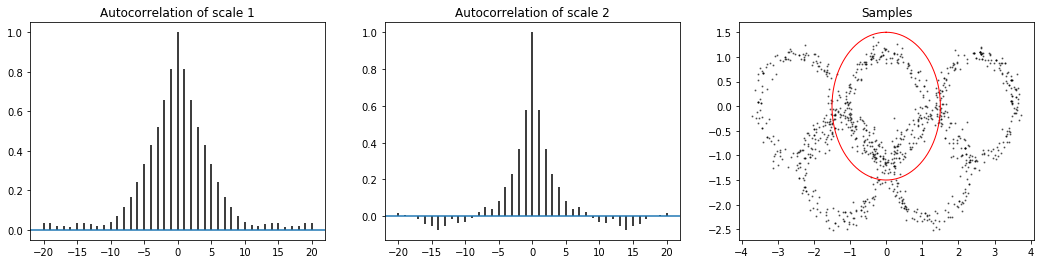

Processing scale =  0.8
Acceptance rate =  0.2867


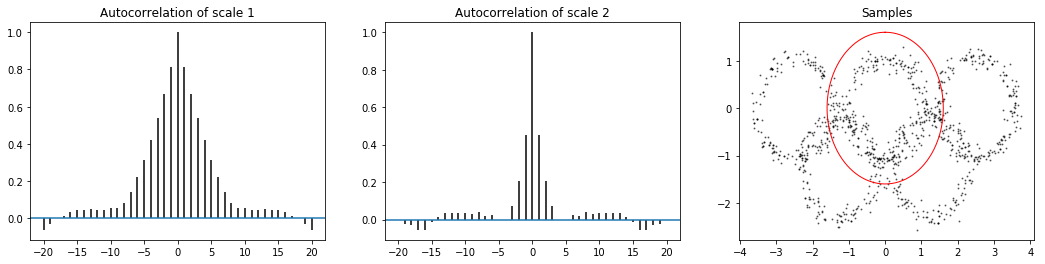

Processing scale =  0.85
Acceptance rate =  0.2716


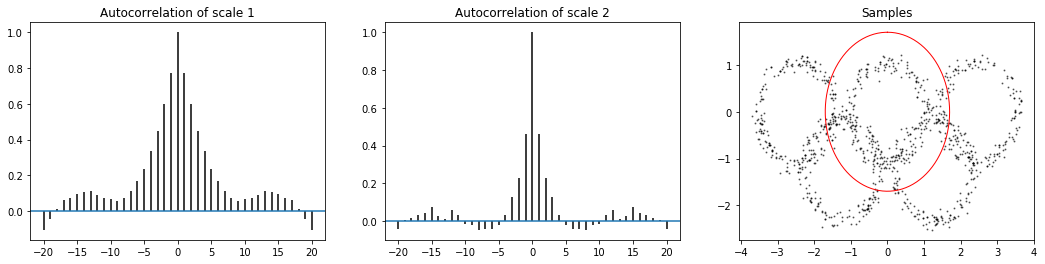

Processing scale =  0.9
Acceptance rate =  0.2686


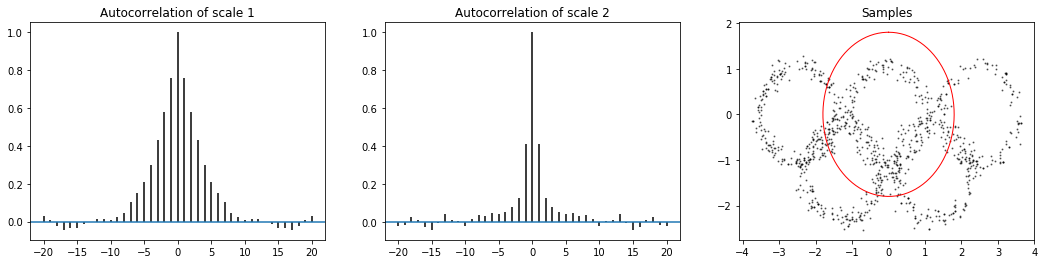

Processing scale =  0.95
Acceptance rate =  0.2672


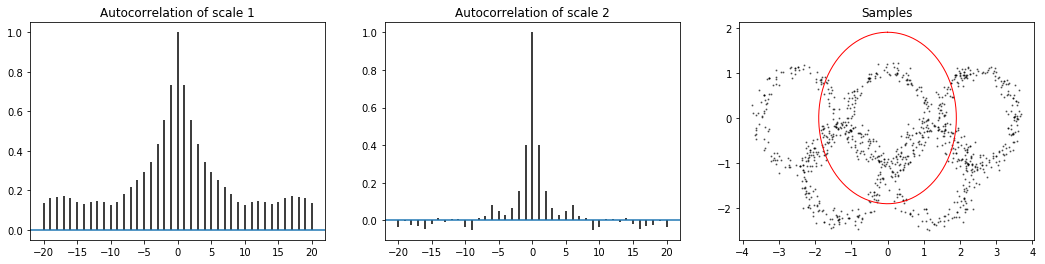

Processing scale =  1
Acceptance rate =  0.2616


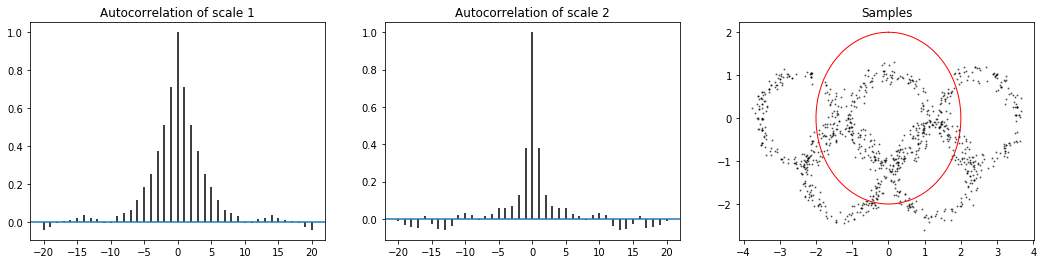

In [56]:
sim_scale = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
             0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
mu_record, acc_rates = [], []

for _ in sim_scale:
    print('Processing scale = ', _)
    sim = simulation(1000, 10, _)
    acc_rates.append(sim[0]); mu_record.append(sim[1])
    print('Acceptance rate = ', sim[0])
    
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1); plt.title('Autocorrelation of scale 1')
    plot_acf(sim[1][:,0])
    plt.subplot(1, 3, 2); plt.title('Autocorrelation of scale 2')
    plot_acf(sim[1][:,1])
    plt.subplot(1, 3, 3); plt.title('Samples')
    plt.plot(sim[1][:,0], sim[1][:,1], 'k.', markersize=2, alpha=.5)
    plt.plot(2 * _ * np.sin(np.linspace(0, 2 * np.pi, 200)),
             2 * _ * np.cos(np.linspace(0, 2 * np.pi, 200)), 'r-', linewidth=1)
    plt.show()

# Mixture of two Gaussians 

In [57]:
def proposal_function(x):
    # A mixture of two Gaussians
    #  - one on the scale of the thickness of the rings and
    #  - one on the scale of the rings themselves.
    if np.random.uniform(0,1) < 0.5:
        return np.random.multivariate_normal(x, [[0.1**2,0],[0,0.1**2]])
    else:
        return np.random.multivariate_normal(x, [[1**2,0],[0,1**2]])

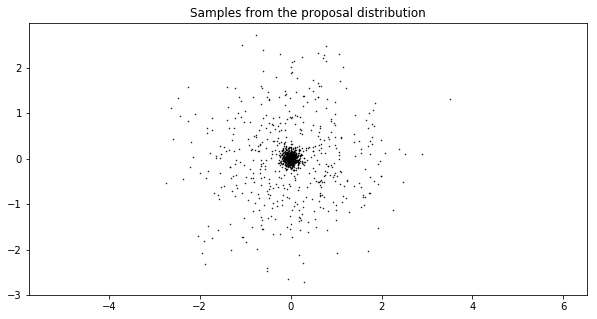

In [58]:
plot_x = []
plot_y = []
for i in range(1000):
    x = proposal_function([0, 0])
    plot_x.append(x[0])
    plot_y.append(x[1])
    
plt.figure(figsize=(10, 5))
plt.plot(plot_x, plot_y, 'k.', markersize=1)
plt.axis('equal')
plt.title('Samples from the proposal distribution')
plt.show()

Acceptance rate: 0.4951


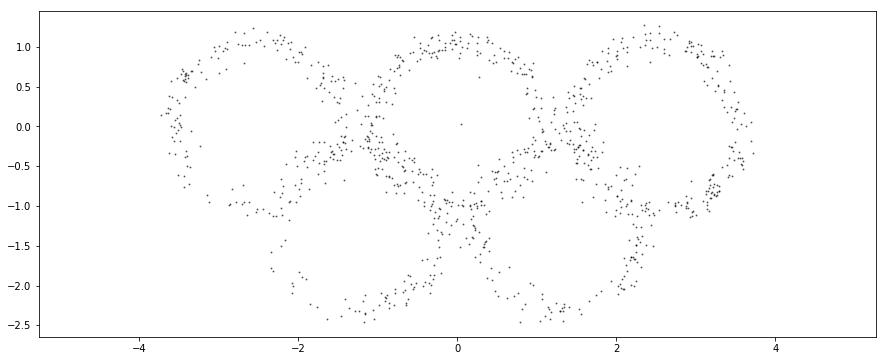

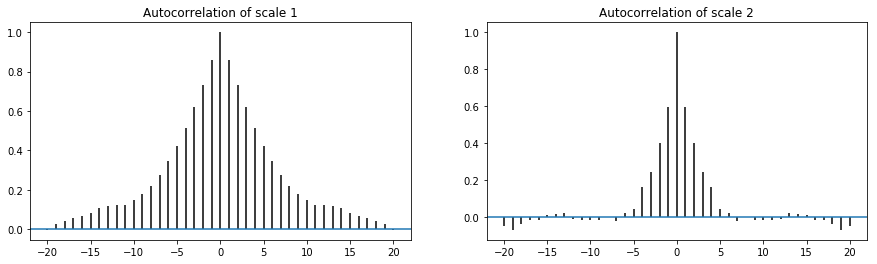

In [64]:
# Change this parameter to test the effect of different proposal distribution
# function scales. The larger the scale the bigger the steps will tend to be,
# but the more likely it is that a step will get rejected.

total_samples = 1000
steps_between_samples = 10
total_steps = total_samples * steps_between_samples

state = np.empty((total_steps + 1, 2))
state[0,:] = [0,0]
accepted = 0
for step in range(total_steps):
    proposal = proposal_function(state[step])
    p = min(1, target_density(proposal) / target_density(state[step]))
    if np.random.uniform(0, 1) < p:
        state[step+1] = proposal
        accepted += 1
    else:
        state[step+1] = state[step]

print('Acceptance rate:', accepted / total_steps)
plt.figure(figsize=(15, 6))
plt.plot(
    state[1::steps_between_samples, 0],
    state[1::steps_between_samples, 1],
    'k.', markersize=2, alpha=0.5)
plt.axis('equal')
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1); plt.title('Autocorrelation of scale 1')
plot_acf(state[1::steps_between_samples, 0])
plt.subplot(1, 2, 2); plt.title('Autocorrelation of scale 2')
plot_acf(state[1::steps_between_samples, 1])
plt.show()